In [72]:
import pandas as pd
import matplotlib.pyplot as plt

dmf = pd.read_csv("../data/bench_baseline_feat.csv", index_col=None)
#dmf = pd.read_csv("/Users/andreamaldonado/git_tree/tag/data/baseline_ED_feat.csv", index_col=None)

#dmf = dmf.drop(['Unnamed: 0'], axis=1)
describe = dmf.describe().transpose()
#print(describe[describe['max']<1].index[:19].tolist())
selected_ft = ['log', 'ratio_variants_per_number_of_traces', 'ratio_most_common_variant', 'ratio_top_1_variants',
               'ratio_top_5_variants', 'ratio_top_10_variants', 'ratio_top_20_variants', 'ratio_top_50_variants',
               'ratio_top_75_variants', 'normalized_variant_entropy', 'normalized_sequence_entropy', 
               'normalized_sequence_entropy_linear_forgetting', 'normalized_sequence_entropy_exponential_forgetting']
#print(selected_ft)
cols_without_temp = list(dmf.columns[:102])
ft_preselection = dmf[cols_without_temp].drop(['Log Nature'], axis=1)
#ft_preselection = dmf[selected_ft]
#ft_preselection['log'] = dmf['log']
print(ft_preselection.shape)
ft_preselection
#ft_preselection


(34, 101)


,log,n_traces,n_unique_traces,ratio_variants_per_number_of_traces,trace_len_min,trace_len_max,trace_len_mean,trace_len_median,trace_len_mode,trace_len_std,...,entropy_knn_5,entropy_knn_7,variant_entropy,normalized_variant_entropy,sequence_entropy,normalized_sequence_entropy,sequence_entropy_linear_forgetting,normalized_sequence_entropy_linear_forgetting,sequence_entropy_exponential_forgetting,normalized_sequence_entropy_exponential_forgetting
0,BPIC15f2,832,828,0.995192,1,132,53.310096,54.0,61,19.894977,...,5.039,4.721,2.405122e+05,0.627973,2.858769e+05,0.602371,1.505466e+05,0.317217,1.853129e+05,0.390473
1,BPIC18,43809,28457,0.649570,24,2973,57.391541,49.0,49,34.872131,...,7.371,7.067,1.156384e+07,0.712079,2.114626e+07,0.570688,1.414023e+07,0.381612,1.557608e+07,0.420362
2,RWABOCSL,1434,116,0.080893,1,25,5.981172,6.0,6,2.166129,...,2.845,2.584,2.382326e+03,0.689363,1.829627e+04,0.235532,7.814868e+03,0.100603,1.072870e+04,0.138113
3,BPIC15f3,1409,1349,0.957417,3,124,42.356991,42.0,44,16.138406,...,5.212,4.900,2.981464e+05,0.661781,3.975043e+05,0.605676,2.241393e+05,0.341521,2.657571e+05,0.404934
4,BPIC19,251734,11973,0.047562,1,990,6.339720,5.0,5,13.057417,...,6.882,6.601,1.690369e+06,0.645530,7.477256e+06,0.328029,7.298458e+06,0.320185,7.300663e+06,0.320282
5,BPIC20e,6886,89,0.012925,1,20,5.343596,5.0,5,1.467384,...,2.574,2.312,1.322840e+03,0.703735,7.313156e+04,0.189048,3.774501e+04,0.097572,4.593493e+04,0.118744
6,BPIC20d,2099,202,0.096236,1,21,8.692711,8.0,8,2.253873,...,3.258,2.987,5.488774e+03,0.723785,5.675857e+04,0.317044,3.309789e+04,0.184879,3.838045e+04,0.214387
7,BPIC20a,10500,99,0.009429,1,24,5.374952,5.0,5,1.486345,...,2.576,2.315,1.649696e+03,0.696474,1.017330e+05,0.164758,5.275579e+04,0.085439,6.445733e+04,0.104389
8,BPIC15f4,1053,1049,0.996201,1,116,44.912631,44.0,42,14.947644,...,5.040,4.729,2.357325e+05,0.652985,3.074084e+05,0.603866,1.811907e+05,0.355927,2.101610e+05,0.412835
9,BPIC12,13087,4366,0.333614,3,175,20.035149,11.0,3,19.943559,...,5.616,5.335,4.749288e+05,0.708280,1.384057e+06,0.423074,7.397790e+05,0.226133,9.014471e+05,0.275551


In [63]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
min_max_scaler = preprocessing.MinMaxScaler()

def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

scaled_dmf = scaleColumns(ft_preselection, ft_preselection.drop(['log'], axis=1).columns)
stats = ft_preselection.describe().transpose()
#stats = scaled_dmf.describe().transpose()

#print(stats.index)
stats.head()

,count,mean,std,min,25%,50%,75%,max
n_traces,34.0,0.097870,0.213476,0.0,0.003322,0.012379,0.069331,1.0
n_unique_traces,34.0,0.122521,0.249317,0.0,0.006388,0.029981,0.045631,1.0
ratio_variants_per_number_of_traces,34.0,0.466611,0.415471,0.0,0.057282,0.386407,0.956895,1.0
trace_len_min,34.0,0.075448,0.181112,0.0,0.000000,0.000000,0.086957,1.0
trace_len_max,34.0,0.091313,0.202147,0.0,0.007823,0.033479,0.049630,1.0


100

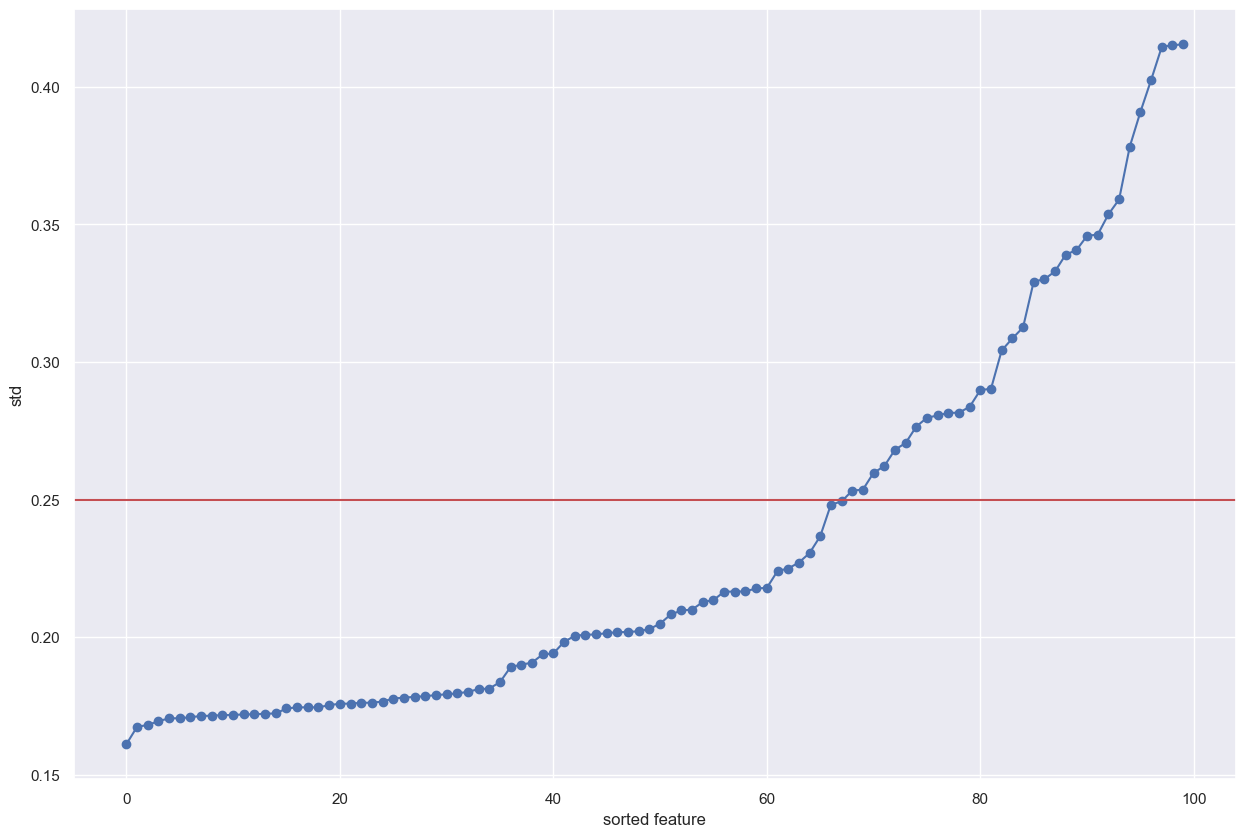

In [64]:
THRESHOLD= 0.001
stats['var'] = stats.apply(lambda x: x['std']**2, axis=1)
sorted_features = stats.sort_values("var", ascending=True)

fig, ax = plt.subplots(figsize=(15, 10))
plt.xlabel("sorted feature")
plt.ylabel("std")
#plt.xticks(sorted_features.index)

plt.plot(range(len(sorted_features)), sorted_features['std'], marker='o')
plt.axhline(y=0.25, color='r', linestyle='-')

filtered_feat = sorted_features[sorted_features['std']>=THRESHOLD].index
len(filtered_feat)

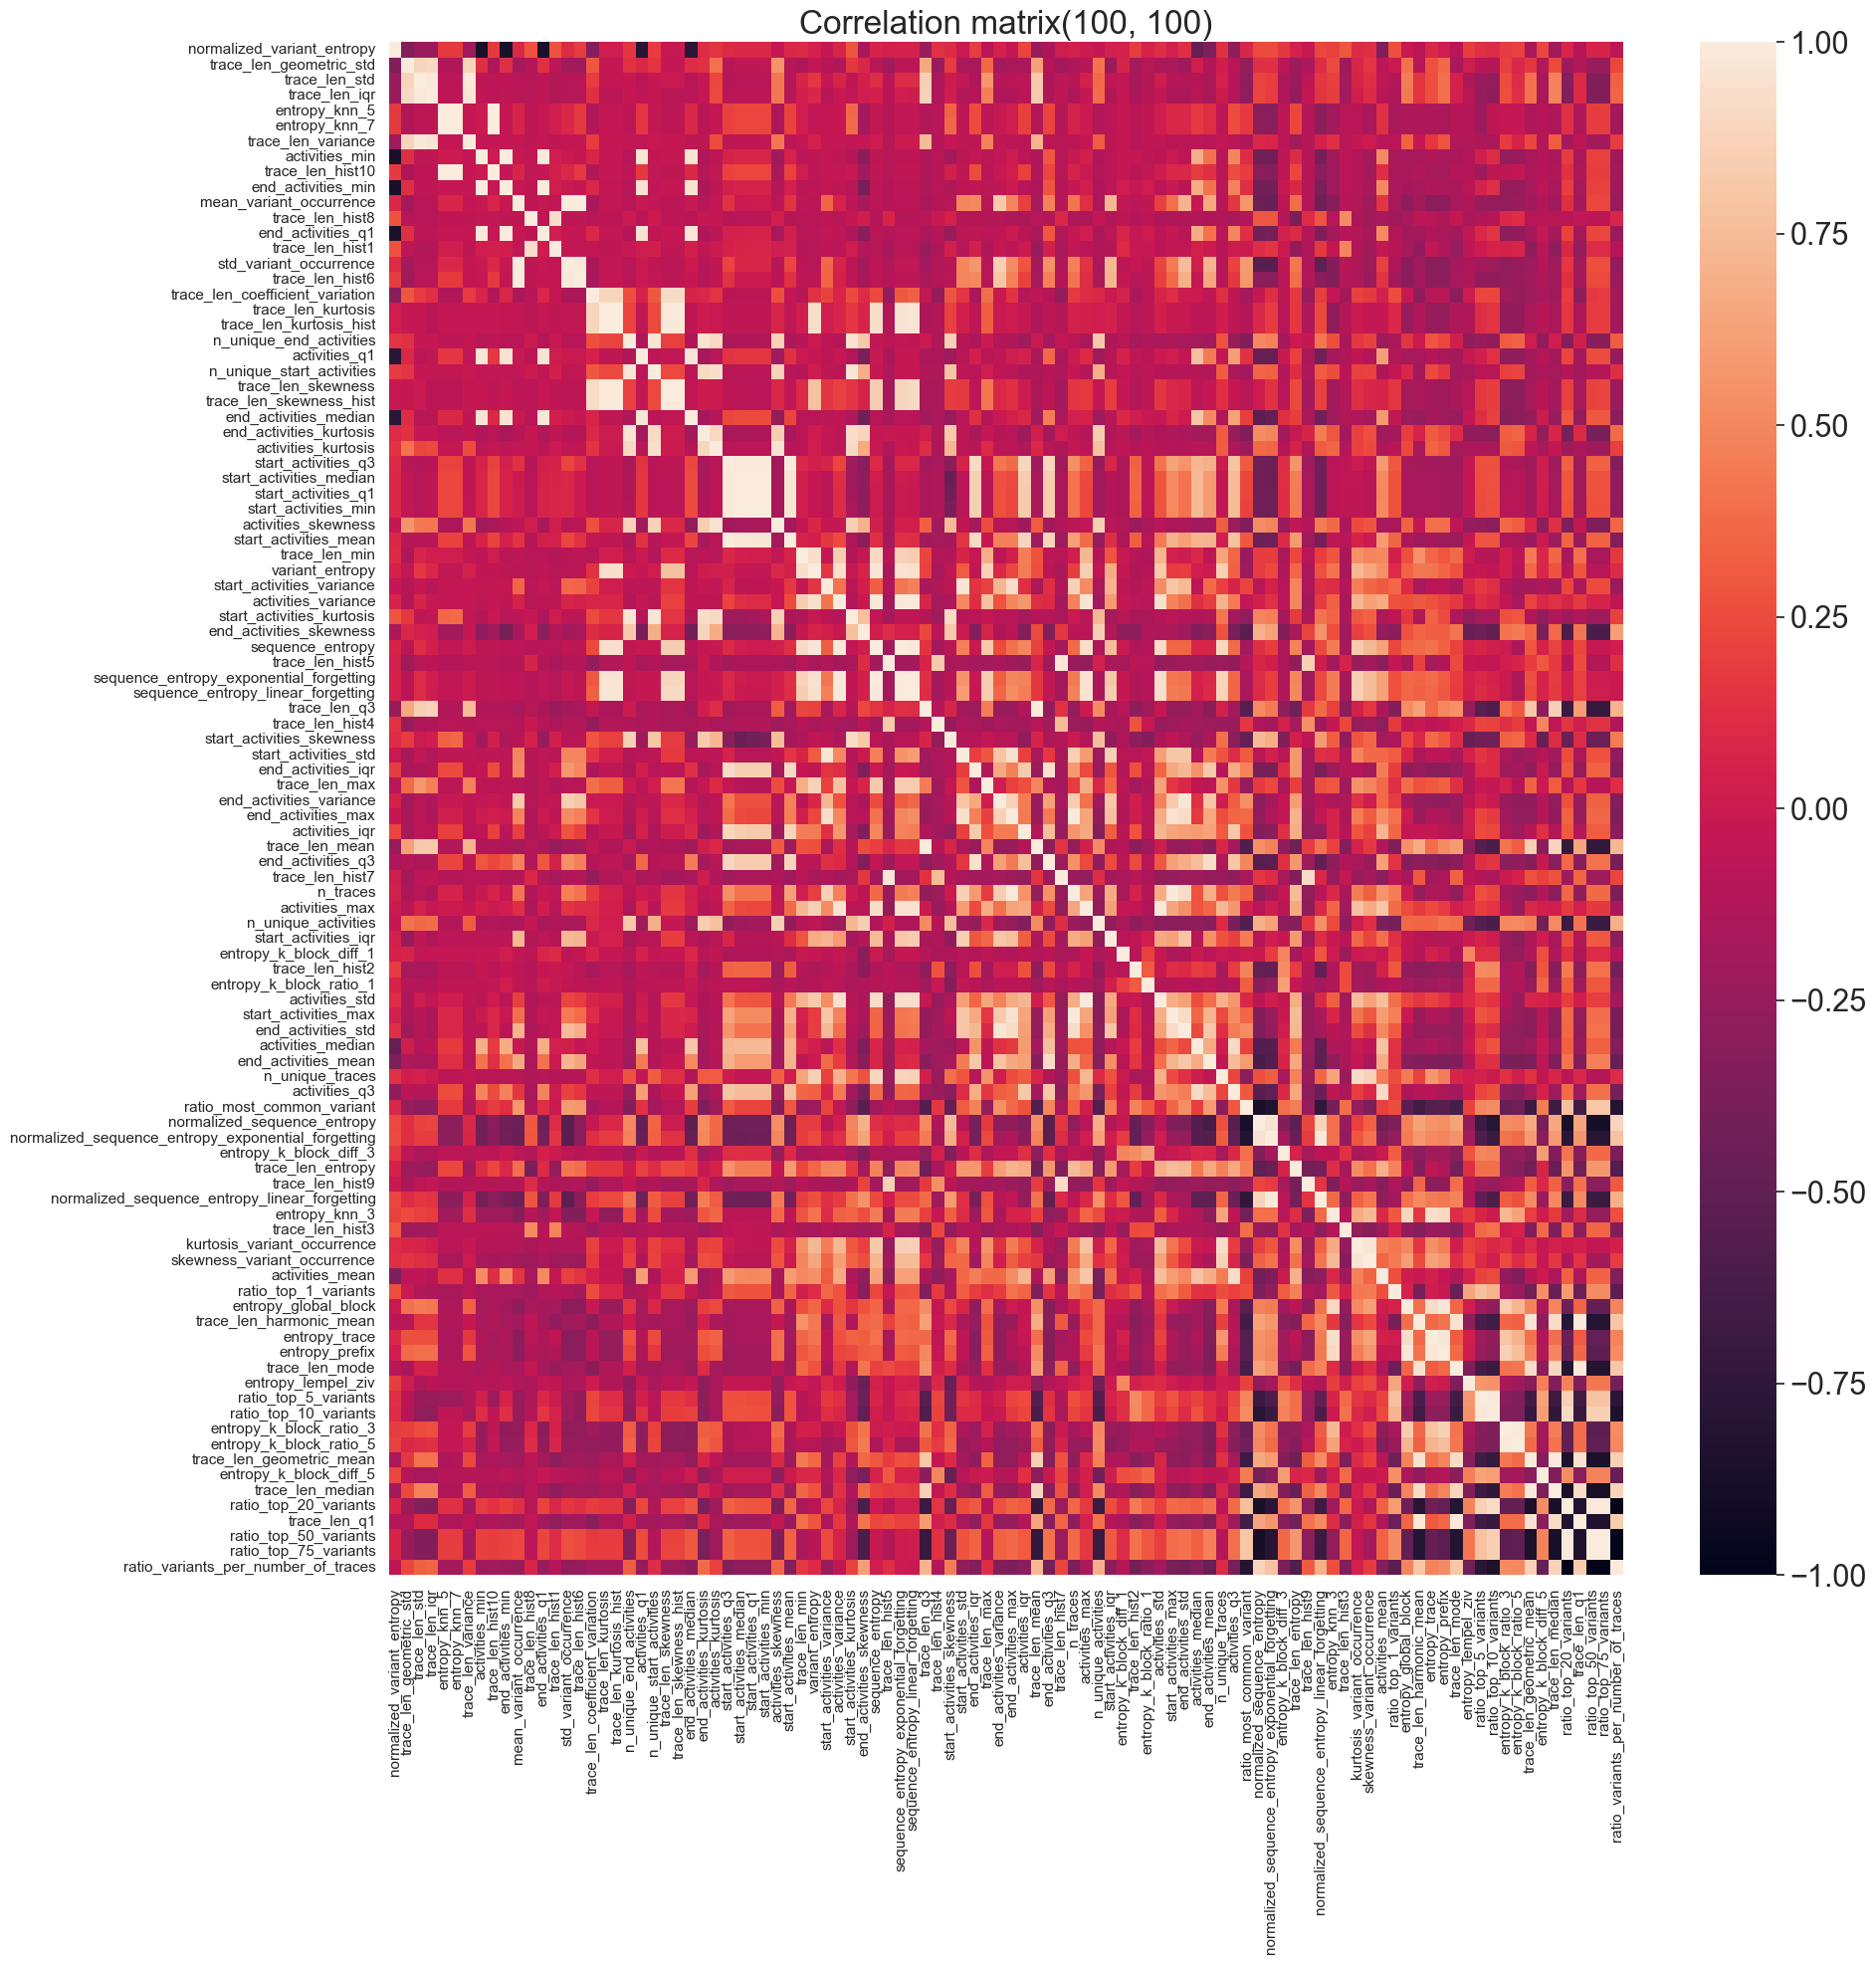

,normalized_variant_entropy,trace_len_geometric_std,trace_len_std,trace_len_iqr,entropy_knn_5,entropy_knn_7,trace_len_variance,activities_min,trace_len_hist10,end_activities_min,...,entropy_k_block_ratio_3,entropy_k_block_ratio_5,trace_len_geometric_mean,entropy_k_block_diff_5,trace_len_median,ratio_top_20_variants,trace_len_q1,ratio_top_50_variants,ratio_top_75_variants,ratio_variants_per_number_of_traces
normalized_variant_entropy,1.000000,-0.341206,-0.230537,-0.226587,0.178985,0.178943,-0.206483,-0.861924,0.175583,-0.863108,...,0.186309,0.198606,-0.159287,0.228908,-0.187971,0.077244,-0.104293,0.069616,0.067783,-0.068488
trace_len_geometric_std,-0.341206,1.000000,0.882809,0.898802,-0.139002,-0.138973,0.881177,0.119611,-0.143975,0.123978,...,0.199139,0.081254,0.159243,-0.123403,0.242138,-0.208480,-0.124629,-0.231831,-0.231916,0.232092
trace_len_std,-0.230537,0.882809,1.000000,0.987609,-0.073120,-0.073087,0.977785,-0.061613,-0.077505,-0.064527,...,0.250017,0.112624,0.399326,-0.167060,0.472389,-0.321738,0.101442,-0.330722,-0.330997,0.330689
trace_len_iqr,-0.226587,0.898802,0.987609,1.000000,-0.070161,-0.070139,0.967753,-0.057717,-0.074311,-0.059986,...,0.259476,0.127618,0.402767,-0.166087,0.478900,-0.336031,0.100793,-0.345541,-0.345949,0.345614
entropy_knn_5,0.178985,-0.139002,-0.073120,-0.070161,1.000000,1.000000,-0.031919,-0.004502,0.999769,-0.036847,...,-0.046307,-0.031360,-0.140630,-0.110465,-0.135123,0.131292,-0.127617,0.186145,0.189692,-0.193394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ratio_top_20_variants,0.077244,-0.208480,-0.321738,-0.336031,0.131292,0.131150,-0.180693,0.185264,0.135087,0.194058,...,-0.499033,-0.487833,-0.846993,0.526841,-0.862281,1.000000,-0.824921,0.991745,0.991361,-0.991075
trace_len_q1,-0.104293,-0.124629,0.101442,0.100793,-0.127617,-0.127508,-0.066676,-0.166254,-0.129984,-0.174746,...,0.387944,0.388326,0.946175,-0.309229,0.919761,-0.824921,1.000000,-0.832498,-0.832272,0.832481
ratio_top_50_variants,0.069616,-0.231831,-0.330722,-0.345541,0.186145,0.186011,-0.183876,0.203686,0.191041,0.209708,...,-0.522102,-0.504889,-0.858941,0.479884,-0.872477,0.991745,-0.832498,1.000000,0.999979,-0.999957
ratio_top_75_variants,0.067783,-0.231916,-0.330997,-0.345949,0.189692,0.189559,-0.184248,0.205950,0.194617,0.211805,...,-0.523124,-0.505709,-0.858895,0.477358,-0.872387,0.991361,-0.832272,0.999979,1.000000,-0.999989


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns



selected_per_category_highest_variance = ['ratio_unique_traces_per_trace', # simple_statistics
                                         'trace_len_hist8',# trace_length
                                         'skewness_variant_occurrence',# trace_variant
                                         'activities_mean',# activities
                                         'start_activities_kurtosis',# start_activities
                                         'end_activities_median',# end_activities
                                         'entropy_k_block_diff_1',# entropies
                                         'n_traces', 'n_unique_traces'
                                         ]
def plot_miner_correlation(input_df):
    #df = input_df.loc[:, input_df.columns.isin(selected_per_category_highest_variance)]
    df = input_df.loc[:,:]
    #df = input_df.loc[:, sorted_features]
    #df = input_df.loc[:, input_df.columns[3:]]

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(20,20)) 
    sns.set(font_scale = 2)
    b= sns.heatmap(corr,
                ax=ax,
                vmin=-1,
                vmax=1,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)
    plt.title("Correlation matrix"+str(corr.shape))
    #b.set_yticklabels(b.get_yticks(), size = 15)
    plt.show()
    return corr

#scaled_dmf = scaled_dmf.drop(['log', 'Log Nature'], axis=1)
scaled_dmf = scaled_dmf[filtered_feat]
corr_df = plot_miner_correlation(scaled_dmf)
stats = stats.loc[filtered_feat]
corr_df

In [66]:
import numpy as np
from sklearn.impute import SimpleImputer
df= ft_preselection.drop(['log'], axis=1)#copy()#loc[:,dmf.columns.isin(selected_highest_score)]

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df)
imp_df = imp_mean.transform(df)
imp_df = pd.DataFrame(imp_df, columns = df.columns)
print(imp_df.shape)
print("Before:", len(df.loc[:, df.isna().any()].columns), "columns in", len(df.loc[:, df.isna().any()]), 'rows')
print("After:", len(imp_df.loc[:, imp_df.isna().any()].columns))

(34, 100)
Before: 18 columns in 34 rows
After: 0


/Users/andreamaldonado/miniconda3/envs/py39/lib/python3.9/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/var/folders/d0/btmbyskx4t106_l2zghzln2w0000gn/T/ipykernel_7910/722551070.py:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  _ = plt.tight_layout()


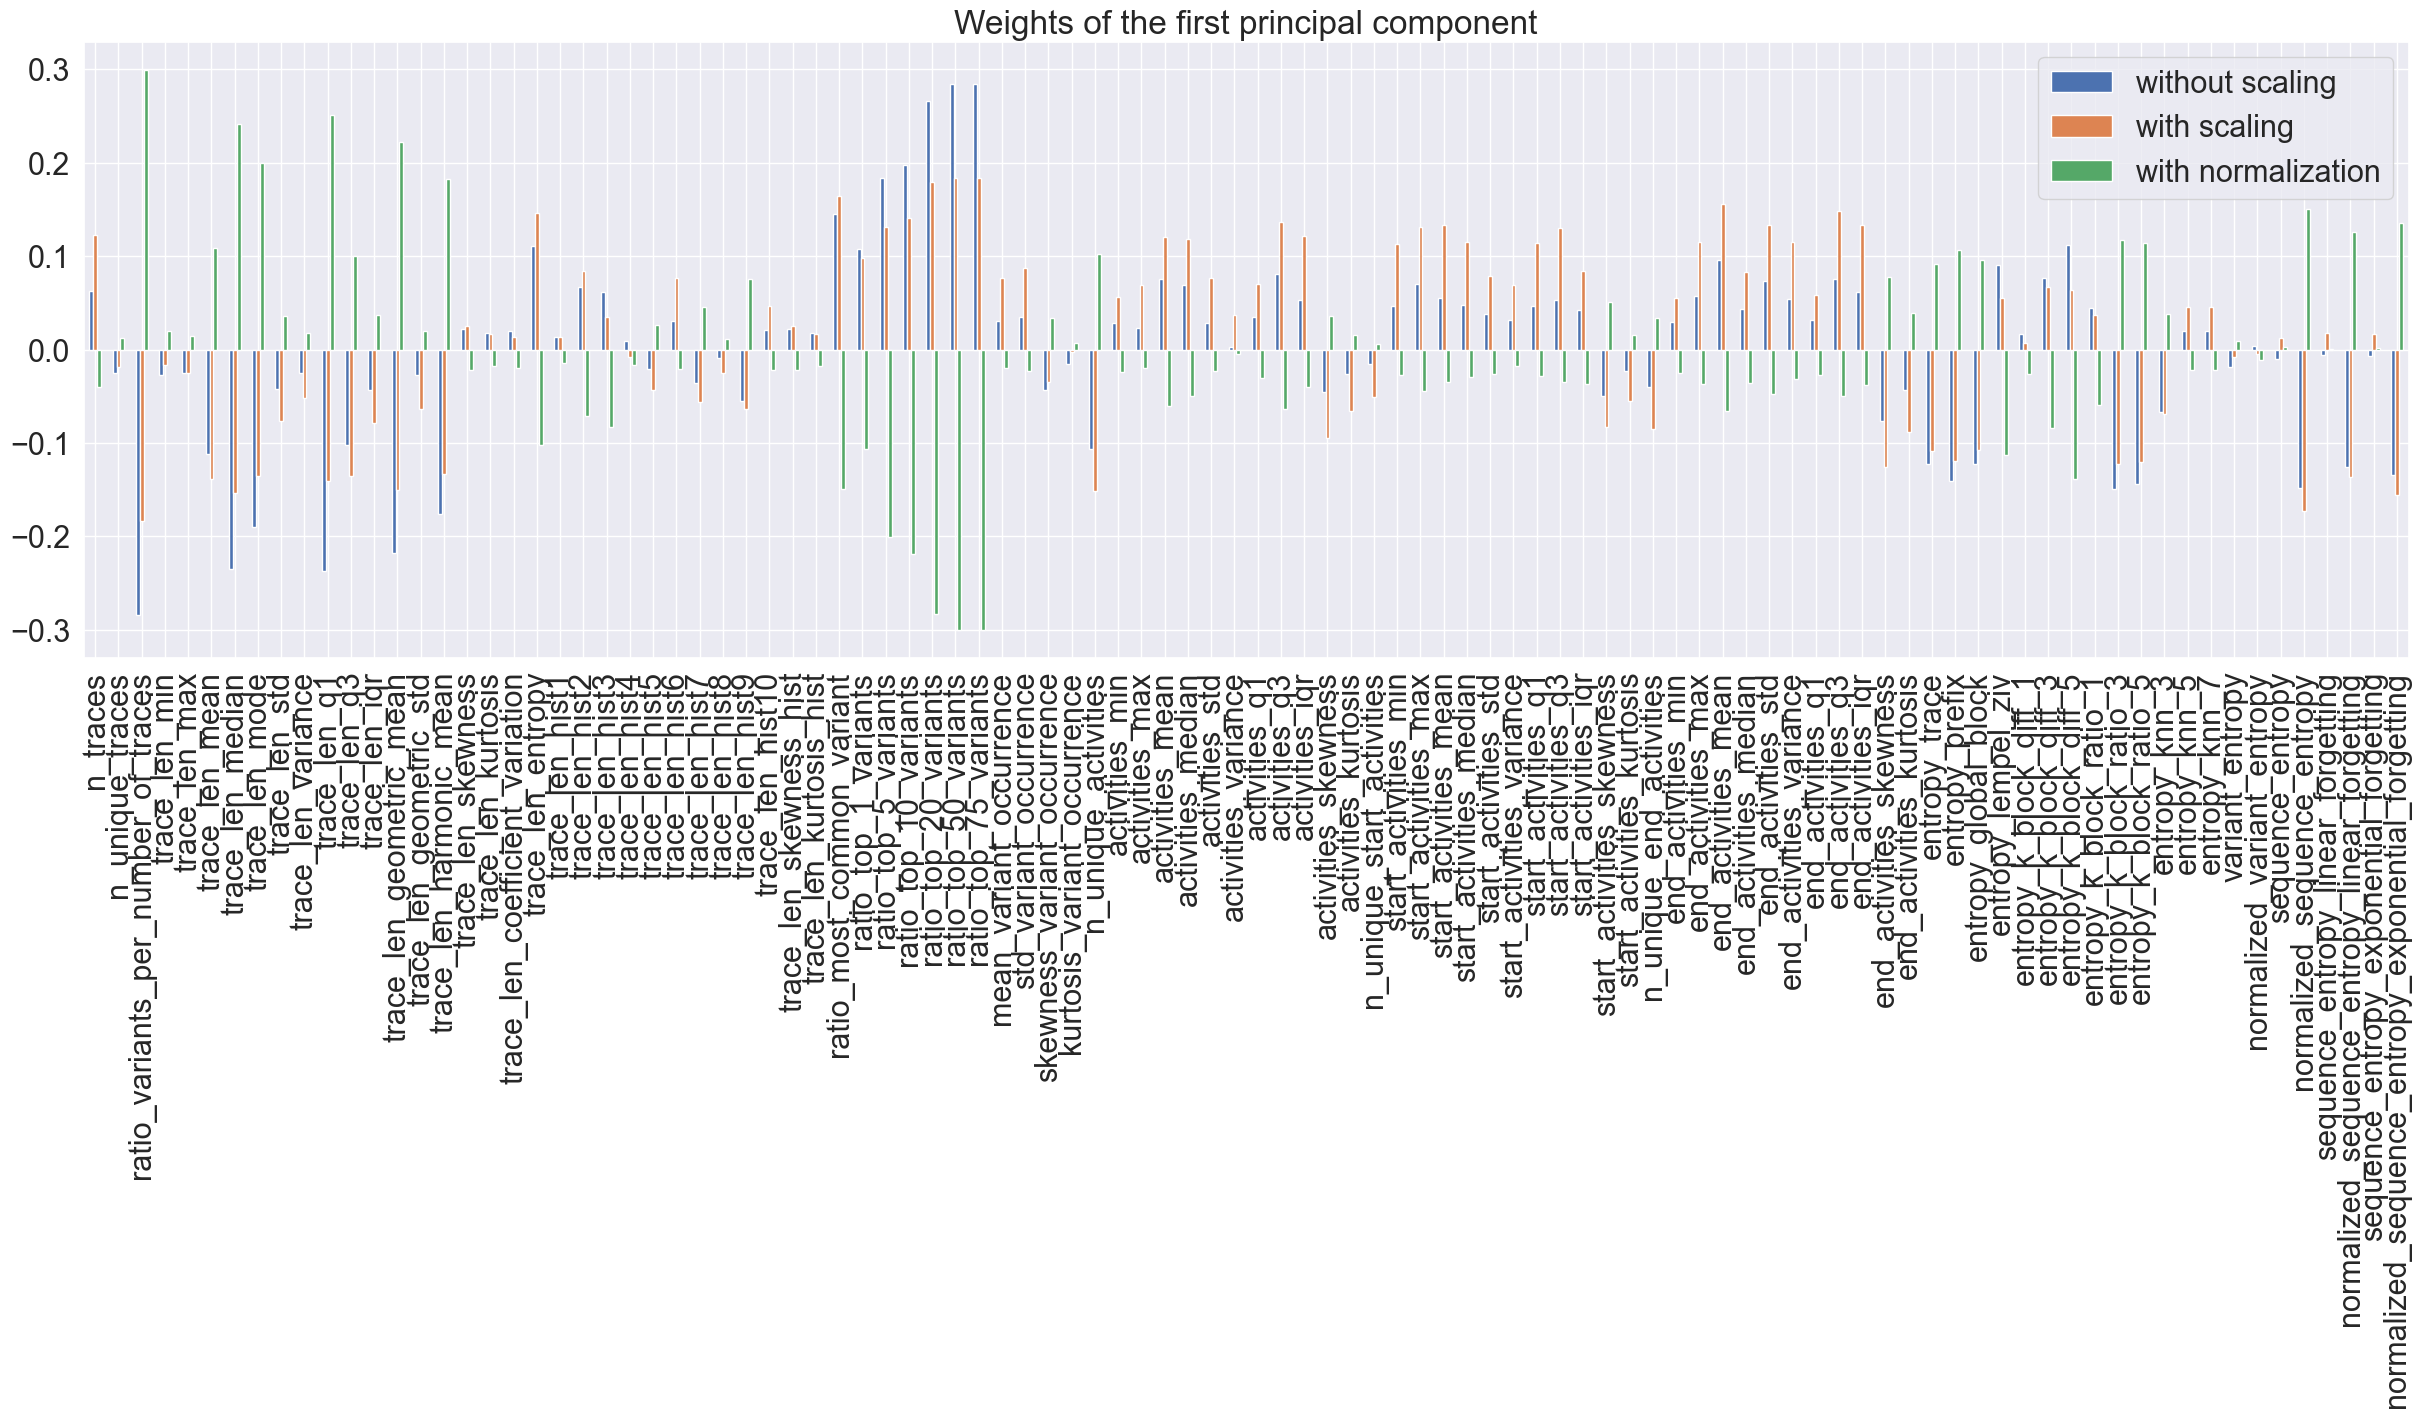

In [67]:
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

X = imp_df
scaler = StandardScaler()
minmaxscaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X)
normed_X = Normalizer(norm="l2").fit_transform(X)
minmaxscaled_X = minmaxscaler.fit_transform(X)


import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(minmaxscaled_X)
minmax_pca =  PCA(n_components=2).fit(X)
scaled_pca = PCA(n_components=2).fit(scaled_X_train)
norm_pca = PCA(n_components=2).fit(normed_X)


X_train_transformed = pca.transform(X)
X_train_minmax_transformed = pca.transform(minmaxscaled_X)
X_train_std_transformed = scaled_pca.transform(scaled_X_train)
X_train_norm_transformed = norm_pca.transform(normed_X)


first_pca_component = pd.DataFrame(
    pca.components_[0], index=X.columns, columns=["without scaling"]
)
first_pca_component["with scaling"] = scaled_pca.components_[0]
first_pca_component["with normalization"] = norm_pca.components_[0]
first_pca_component.plot.bar(
    title="Weights of the first principal component", figsize=(30, 8)
)

_ = plt.tight_layout()



In [68]:
type(norm_pca.components_[0])
weights = pd.DataFrame([dict(zip(X.columns, norm_pca.components_[0]))]).transpose()
weights = weights.rename(columns={0:'weights_norm'})
weights = weights.sort_values(by='weights_norm', ascending=False)

In [77]:
def feature_selection(pca_weights, corr_df, top=5, threshold=0.8):
    """Recursive threshholding of correlation matrix while considering pca_weights.
    
    :param DataFrame pca_weights: Containing sorted pca weights for all features
    :param DataFrame corr_df: Containing correlation matrix of all feature pairs
    """
    pca_weights = pca_weights[:100]
    result = []
    correlated_fts= []
    for column in pca_weights.index.tolist():
        #print("FEATURE", column)
        correlated_fts = corr_df[corr_df[column]>=threshold][column].index.tolist()
        correlated_fts.remove(column)
        #print("CORR",correlated_fts)
        if len(set(result).intersection(set(correlated_fts)))>0:
            #print("INTERSECTION", set(result).intersection(set(correlated_fts)))
            continue
        else:
            result.append(column)
        #print("CURRENT RESULT:", result)

        if len(result)>=top:
            break
    pca_weights = pca_weights.rename_axis('feature').reset_index()
    result = pca_weights[pca_weights['feature'].isin(result)]
    print("RESULT", result)
    return result

sel_fts = feature_selection(weights, corr_df.abs())['feature']

RESULT                                               feature  weights_norm
0                 ratio_variants_per_number_of_traces      0.299200
5                             trace_len_harmonic_mean      0.182347
7   normalized_sequence_entropy_exponential_forget...      0.135476
9                             entropy_k_block_ratio_3      0.117595
11                                     trace_len_mean      0.108693


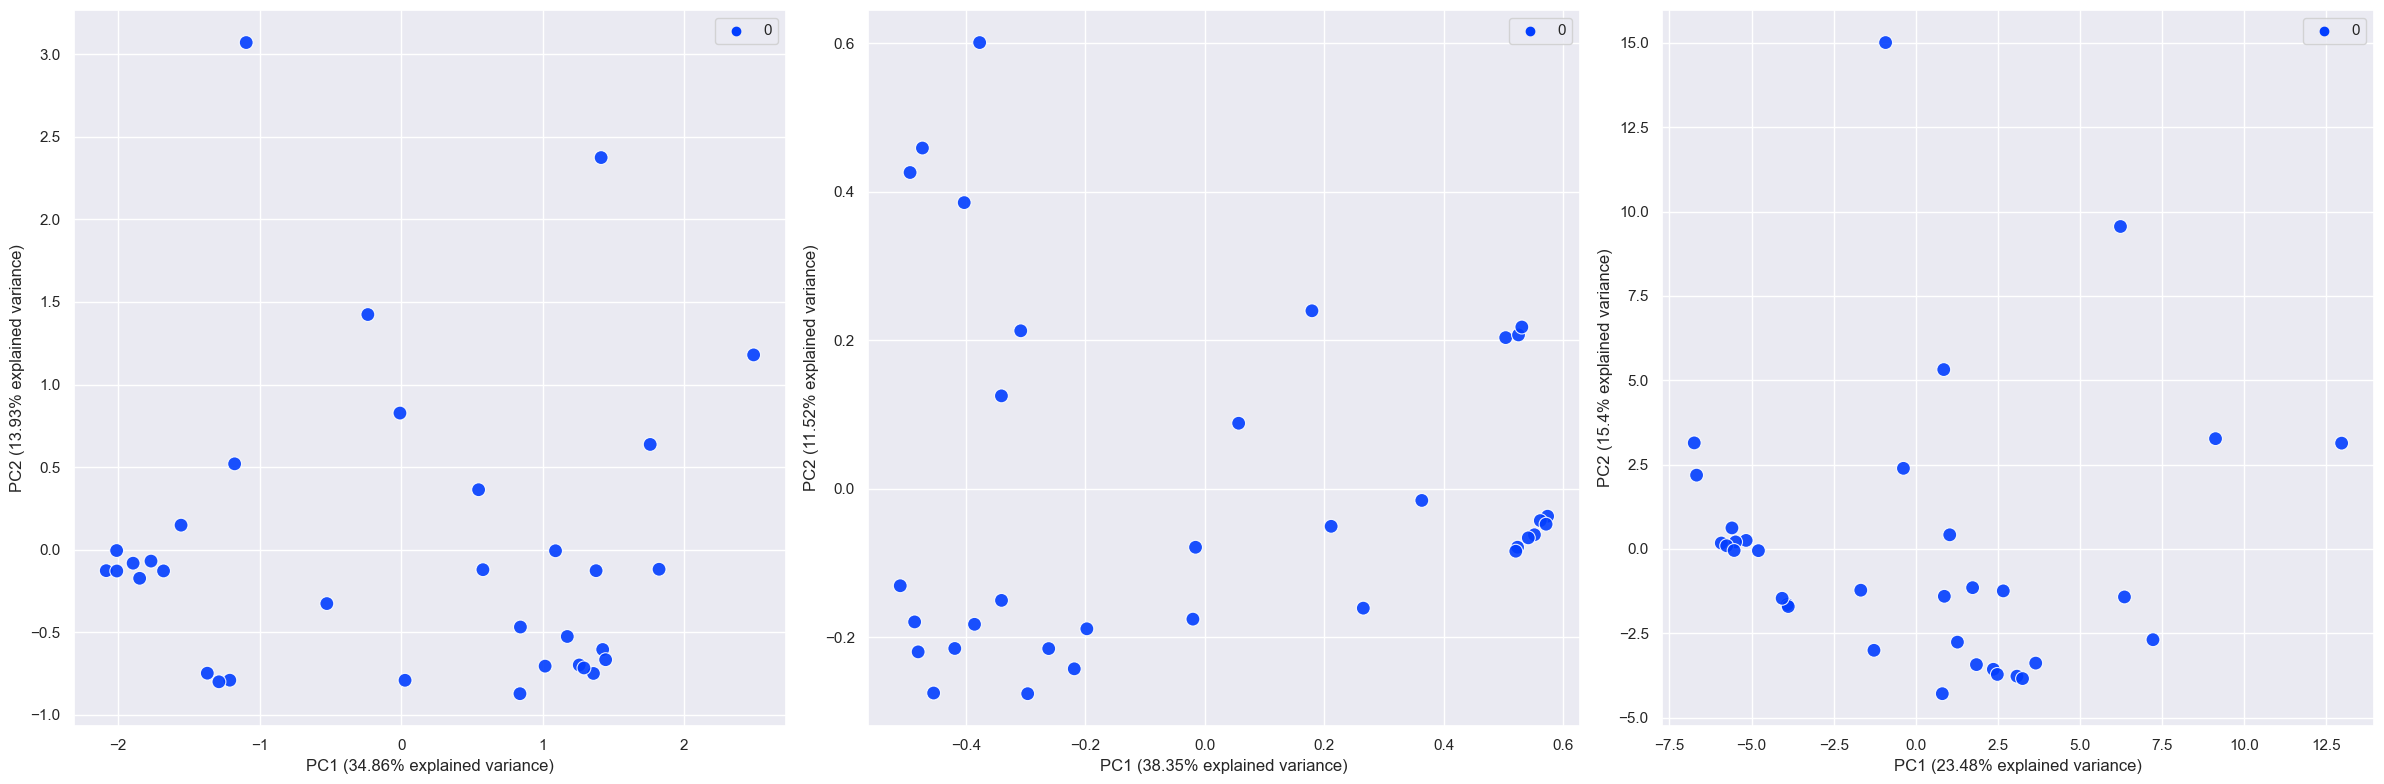

In [70]:
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)

# Normalizer: By default, L2 normalization is applied to each observation so the that the values in a row have a unit norm. 
    # Unit norm with L2 means that if each element were squared and summed, the total would equal 1. 
    #Normalizer does transform all the features to values between -1 and 1. 
#norm_data = Normalizer(norm="l2").fit_transform(df.drop(["log"], axis=1))
norm_data = Normalizer(norm="l2").fit_transform(X)

#StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. 
    #Unit variance means dividing all the values by the standard deviation.
scaler = StandardScaler()
sca_data = scaler.fit_transform(X)
#norm_data = Normalizer(norm="l2").fit_transform(norm_data)

sns.set_theme()
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(24, 8))

#X_new = pca.fit_transform(X)
X_new = pca.fit_transform(minmaxscaled_X)
df_pca = pd.DataFrame(X_new, columns=["PC1", "PC2"])
sns.scatterplot(ax=ax1, data=df_pca, x="PC1", y="PC2", palette="bright", hue=[0]*len(df_pca), alpha=0.9, s=100)
ax1.set_xlabel(f"PC1 ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% explained variance)")
ax1.set_ylabel(f"PC2 ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% explained variance)")

X_new_norm = pca.fit_transform(norm_data)
df_pca_norm = pd.DataFrame(X_new_norm, columns=["PC1", "PC2"])
sns.scatterplot(ax=ax2, data=df_pca_norm, x="PC1", y="PC2", palette="bright", hue=[0]*len(df_pca), alpha=0.9, s=100)
ax2.set_xlabel(f"PC1 ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% explained variance)")
ax2.set_ylabel(f"PC2 ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% explained variance)")

X_new_sca = pca.fit_transform(sca_data)
df_pca_sca = pd.DataFrame(X_new_sca, columns=["PC1", "PC2"])
sns.scatterplot(ax=ax3, data=df_pca_sca, x="PC1", y="PC2", palette="bright", hue=[0]*len(df_pca), alpha=0.9, s=100)
ax3.set_xlabel(f"PC1 ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% explained variance)")
ax3.set_ylabel(f"PC2 ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% explained variance)")
plt.tight_layout()
# plt.show()
# plt.close()

#ratio number of activities and traces... 

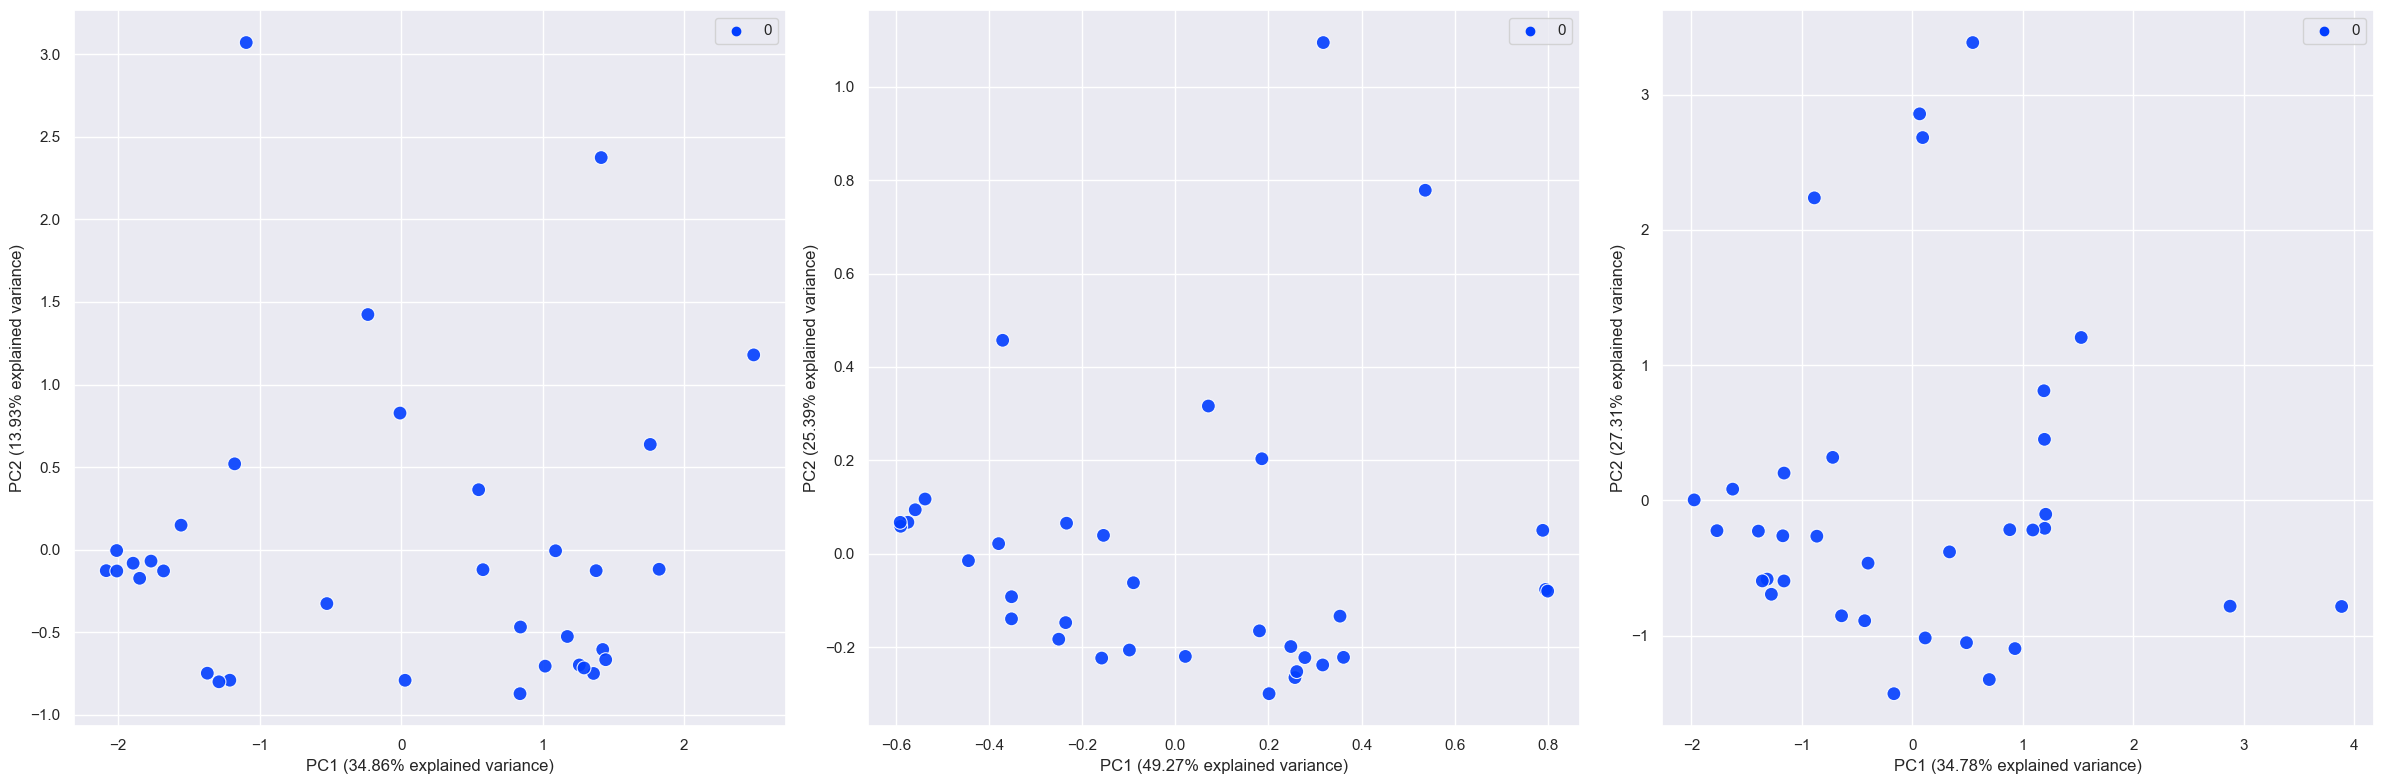

In [71]:
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

X = X[sel_fts]
pca = PCA(n_components=2)

# Normalizer: By default, L2 normalization is applied to each observation so the that the values in a row have a unit norm. 
    # Unit norm with L2 means that if each element were squared and summed, the total would equal 1. 
    #Normalizer does transform all the features to values between -1 and 1. 
#norm_data = Normalizer(norm="l2").fit_transform(df.drop(["log"], axis=1))
norm_data = Normalizer(norm="l2").fit_transform(X)

#StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. 
    #Unit variance means dividing all the values by the standard deviation.
scaler = StandardScaler()
sca_data = scaler.fit_transform(X)
#norm_data = Normalizer(norm="l2").fit_transform(norm_data)

sns.set_theme()
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(24, 8))

#X_new = pca.fit_transform(X)
X_new = pca.fit_transform(minmaxscaled_X)
df_pca = pd.DataFrame(X_new, columns=["PC1", "PC2"])
sns.scatterplot(ax=ax1, data=df_pca, x="PC1", y="PC2", palette="bright", hue=[0]*len(df_pca), alpha=0.9, s=100)
ax1.set_xlabel(f"PC1 ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% explained variance)")
ax1.set_ylabel(f"PC2 ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% explained variance)")

X_new_norm = pca.fit_transform(norm_data)
df_pca_norm = pd.DataFrame(X_new_norm, columns=["PC1", "PC2"])
sns.scatterplot(ax=ax2, data=df_pca_norm, x="PC1", y="PC2", palette="bright", hue=[0]*len(df_pca), alpha=0.9, s=100)
ax2.set_xlabel(f"PC1 ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% explained variance)")
ax2.set_ylabel(f"PC2 ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% explained variance)")

X_new_sca = pca.fit_transform(sca_data)
df_pca_sca = pd.DataFrame(X_new_sca, columns=["PC1", "PC2"])
sns.scatterplot(ax=ax3, data=df_pca_sca, x="PC1", y="PC2", palette="bright", hue=[0]*len(df_pca), alpha=0.9, s=100)
ax3.set_xlabel(f"PC1 ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% explained variance)")
ax3.set_ylabel(f"PC2 ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% explained variance)")
plt.tight_layout()
# plt.show()
# plt.close()

#ratio number of activities and traces... 